**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary_v2"
)
txt_fname = "matrix.annotation.prepare.cres_vote1_gcfilter.chipseq_full.fcc.tss.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

mat_region_annot_full_cres = dat
print(dim(dat))
head(dat, 3)

[1] 87610   537


Region,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,LMPRA_R,TMPRA_R,CRISPRi-HCRFF:CASA,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:16025-16338,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1:115429-115969,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0


In [11]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary2"
)
txt_fname = "result.summary.fcc_peak_call.assayvote.gcfilter.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_fcc_vote = dat
print(dim(dat))
head(dat, 3)

[1] 175421      3


Region,Num_Assay,Type
<chr>,<dbl>,<chr>
chr1:115429-115969,1,Enhancer
chr1:184091-184563,1,Enhancer
chr1:605104-605675,1,Enhancer


In [ ]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary2"
)
txt_fname = "umap.cluster.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_umap_cluster = dat
print(dim(dat))
head(dat, 3)

In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "result.summary.encode_chromatin_states.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot_ccres = dat
print(dim(dat))
head(dat, 3)

[1] 418821      6


Chrom,ChromStart,ChromEnd,Region,Group,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,cCREs,Low-DNase
chr1,10038,10405,chr1:10038-10405,ChromHMM,Quies
chr1,14282,14614,chr1:14282-14614,ChromHMM,Quies


In [5]:
dat = dat_region_annot_ccres
dat = dat %>% 
    dplyr::filter(Group == "cCREs") %>% 
    dplyr::select(Region, Label) %>%
    dplyr::mutate(Value = 1) %>%
    tidyr::spread(Label, Value) %>%
    replace(is.na(.), 0)

mat_region_annot_ccres = dat
print(dim(dat))
head(dat)

[1] 137858      9


Region,CA-CTCF,CA-H3K4me3,CA-only,CA-TF,dELS,Low-DNase,pELS,PLS
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:100028014-100029653,0,0,0,0,0,1,0,0
chr1:100036895-100039189,0,0,0,0,0,0,1,1
chr1:100046252-100046533,0,0,0,0,0,1,0,0
chr1:100048290-100048918,0,0,0,1,0,1,0,0
chr1:100050225-100050529,0,0,0,1,0,0,0,0
chr1:100090676-100091265,0,0,0,0,0,1,0,0


In [14]:
dat = dat_region_fcc_vote
dat = dat %>%
    dplyr::filter(Type == "Enhancer") %>%
    dplyr::select(Region, Num_Assay)

mat_region_fcc_vote = dat
print(dim(dat))
head(dat)

[1] 47686     2


Region,Num_Assay
<chr>,<dbl>
chr1:115429-115969,1
chr1:184091-184563,1
chr1:605104-605675,1
chr1:778233-779389,3
chr1:818708-819335,1
chr1:826796-828040,1


In [15]:
dat = dat_region_umap_cluster
dat = dat %>%
    dplyr::left_join(mat_region_annot_ccres,     by = "Region") %>%
    dplyr::left_join(mat_region_annot_full_cres, by = "Region") %>%
    dplyr::left_join(mat_region_fcc_vote,        by = "Region") %>%
    replace(is.na(.), 0)

dat_merge = dat
print(dim(dat))
head(dat)

[1] 87610   549


Region,UMAP1,UMAP2,Cluster,CA-CTCF,CA-H3K4me3,CA-only,CA-TF,dELS,Low-DNase,⋯,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3,Num_Assay
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,-21.87767,-9.1761960,39,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
chr1:16025-16338,-12.15321,-12.8799200,20,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
chr1:115429-115969,-11.02704,-3.0313742,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,1
chr1:184091-184563,-20.69949,-0.9725588,24,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,1
chr1:186343-187136,-17.25740,-12.4815150,21,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
chr1:191204-191722,-21.78103,-13.9010320,5,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0


In [16]:
length(unique(dat_merge$Region))

[1] 87610

In [8]:
dat = dat_merge
dat_PLS  = dat %>% dplyr::filter(PLS  == 1)
dat_pELS = dat %>% dplyr::filter(pELS == 1)
dat_dELS = dat %>% dplyr::filter(dELS      == 1)
dat_CTCF = dat %>% dplyr::filter(`CA-CTCF` == 1)

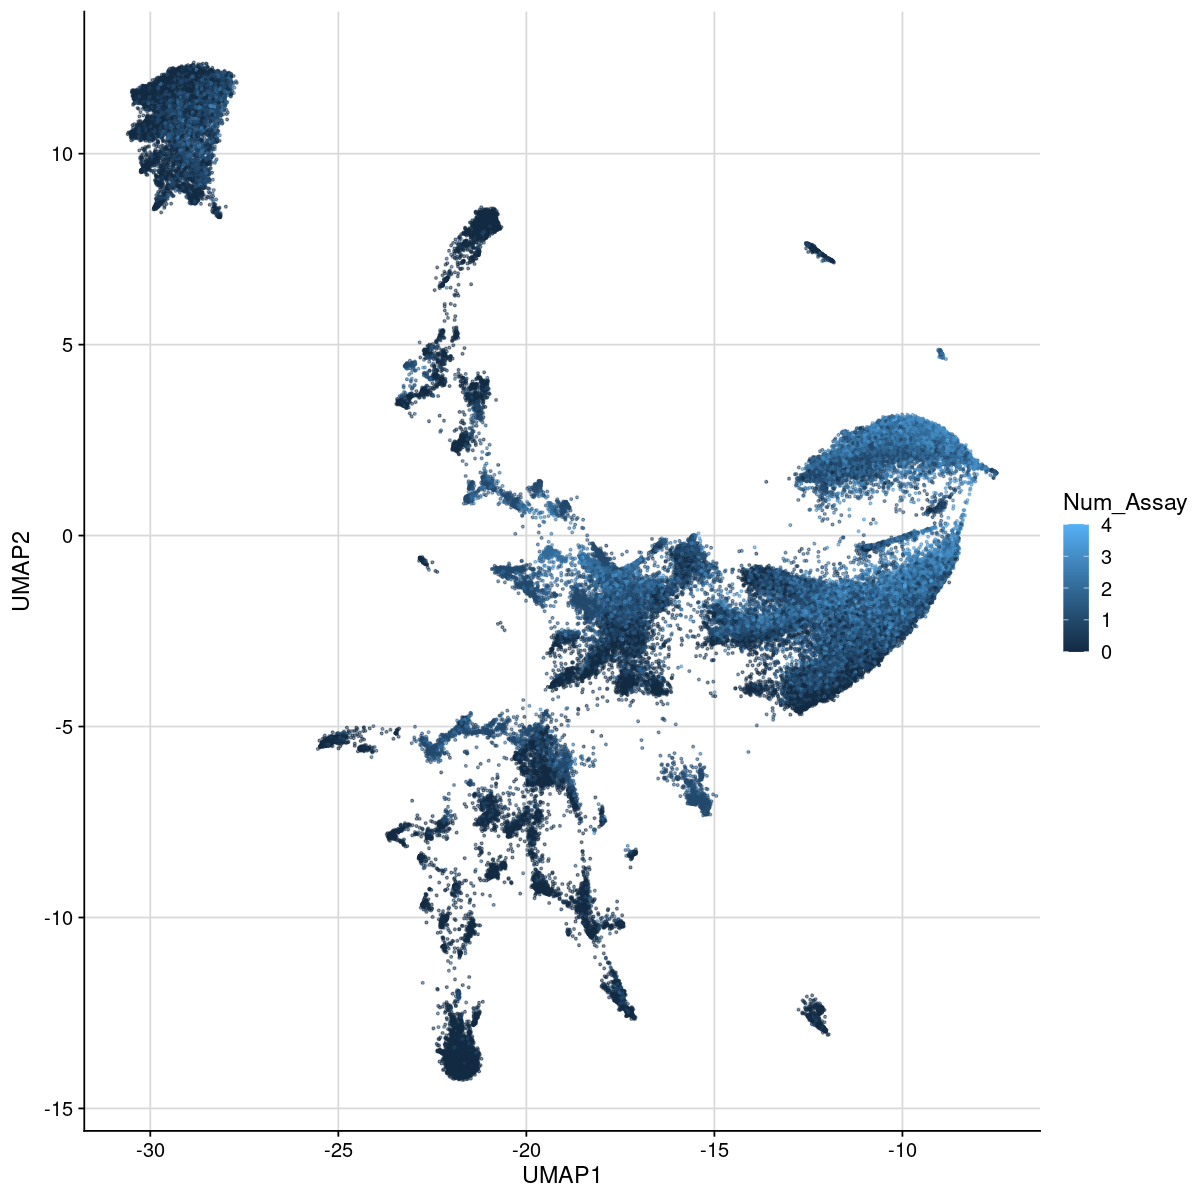

In [17]:
gpt = ggplot(dat_merge, aes(x = UMAP1, y = UMAP2, color = Num_Assay)) +
    geom_point(size = 0.5, alpha = 0.5) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height = 10, repr.plot.width = 10)
print(gpt)

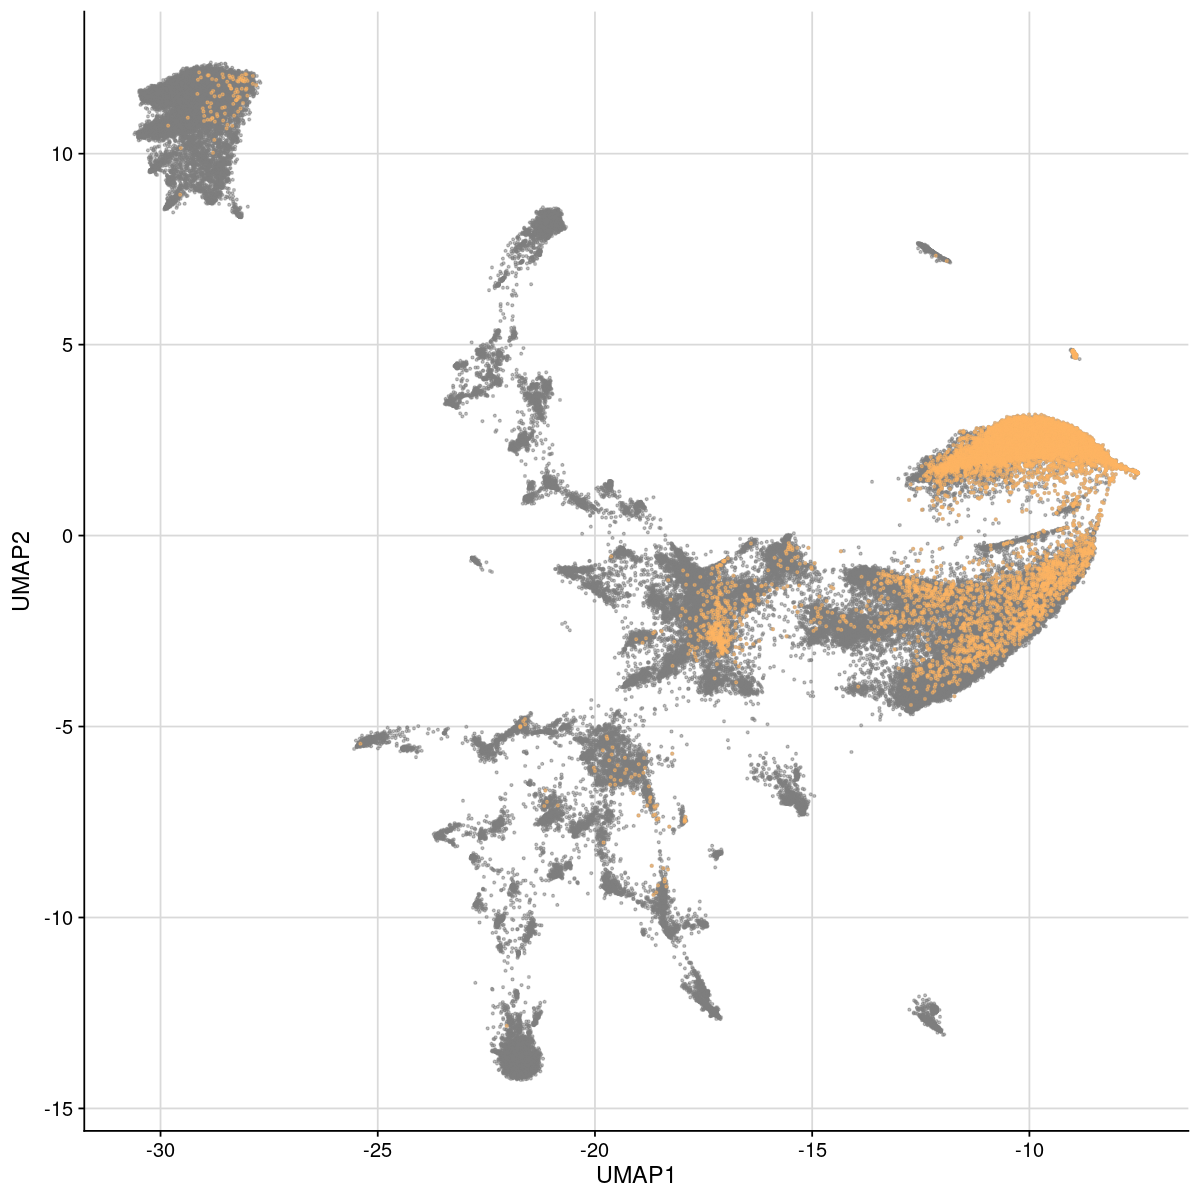

In [9]:
gpt = ggplot() +
    geom_point(data = dat_merge, aes(x = UMAP1, y = UMAP2), size = 0.5, alpha = 0.5, color = "grey50") +
    geom_point(data = dat_pELS,  aes(x = UMAP1, y = UMAP2), size = 0.5, alpha = 0.5, color = "#fdb462") +
    theme_cowplot() +
    background_grid()

options(repr.plot.height = 10, repr.plot.width = 10)
print(gpt)

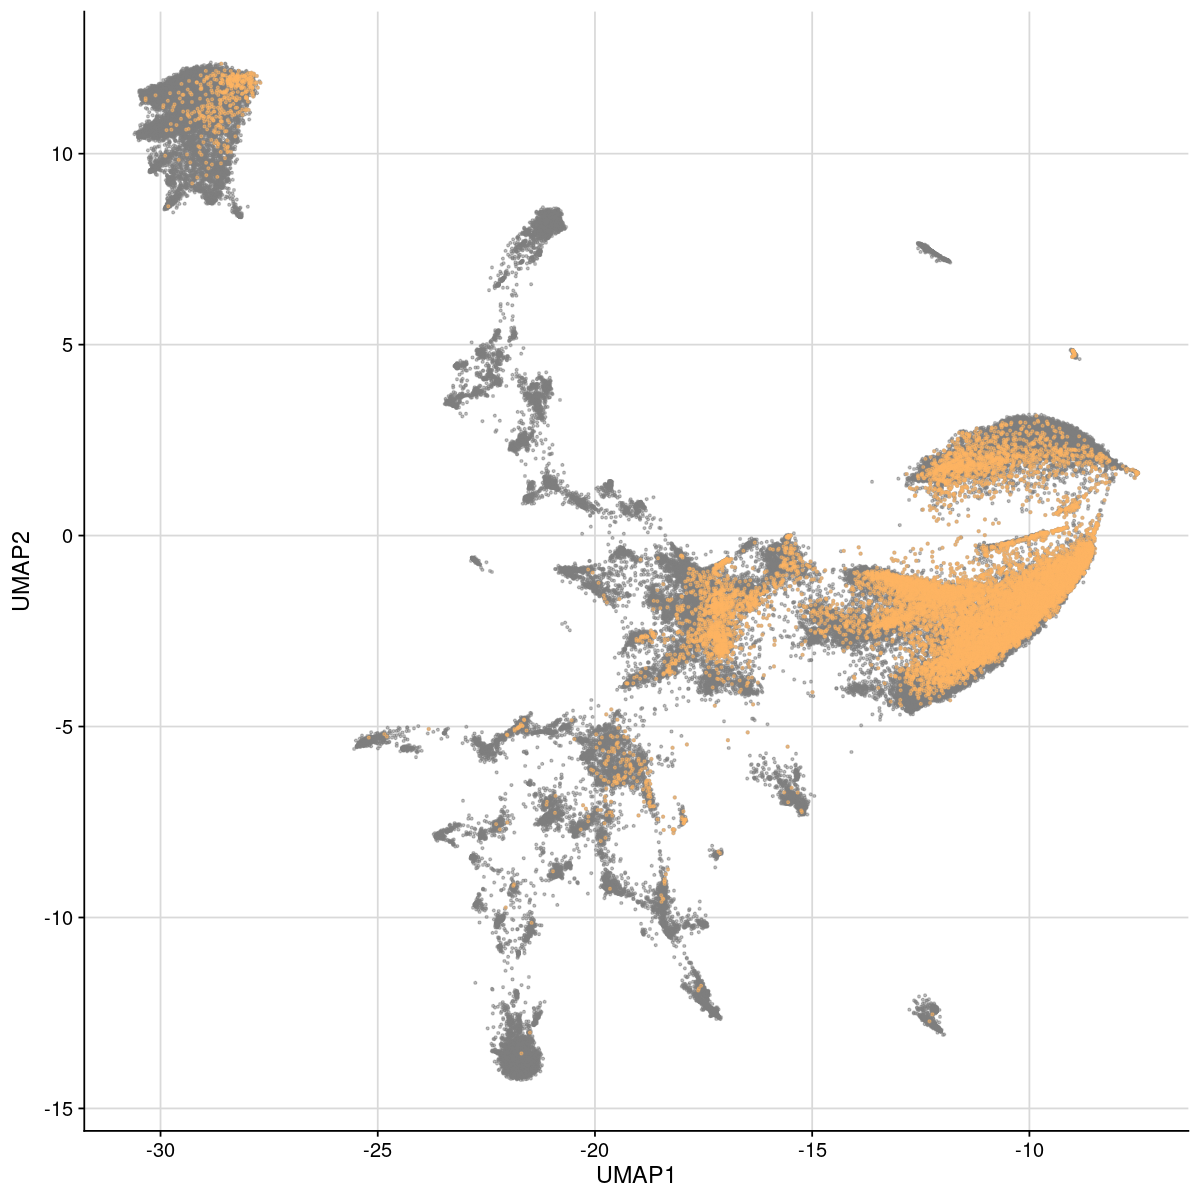

In [10]:
gpt = ggplot() +
    geom_point(data = dat, aes(x = UMAP1, y = UMAP2), size = 0.5, alpha = 0.5, color = "grey50") +
    geom_point(data = dat_dELS, aes(x = UMAP1, y = UMAP2), size = 0.5, alpha = 0.5, color = "#fdb462") +
    theme_cowplot() +
    background_grid()

options(repr.plot.height = 10, repr.plot.width = 10)
print(gpt)

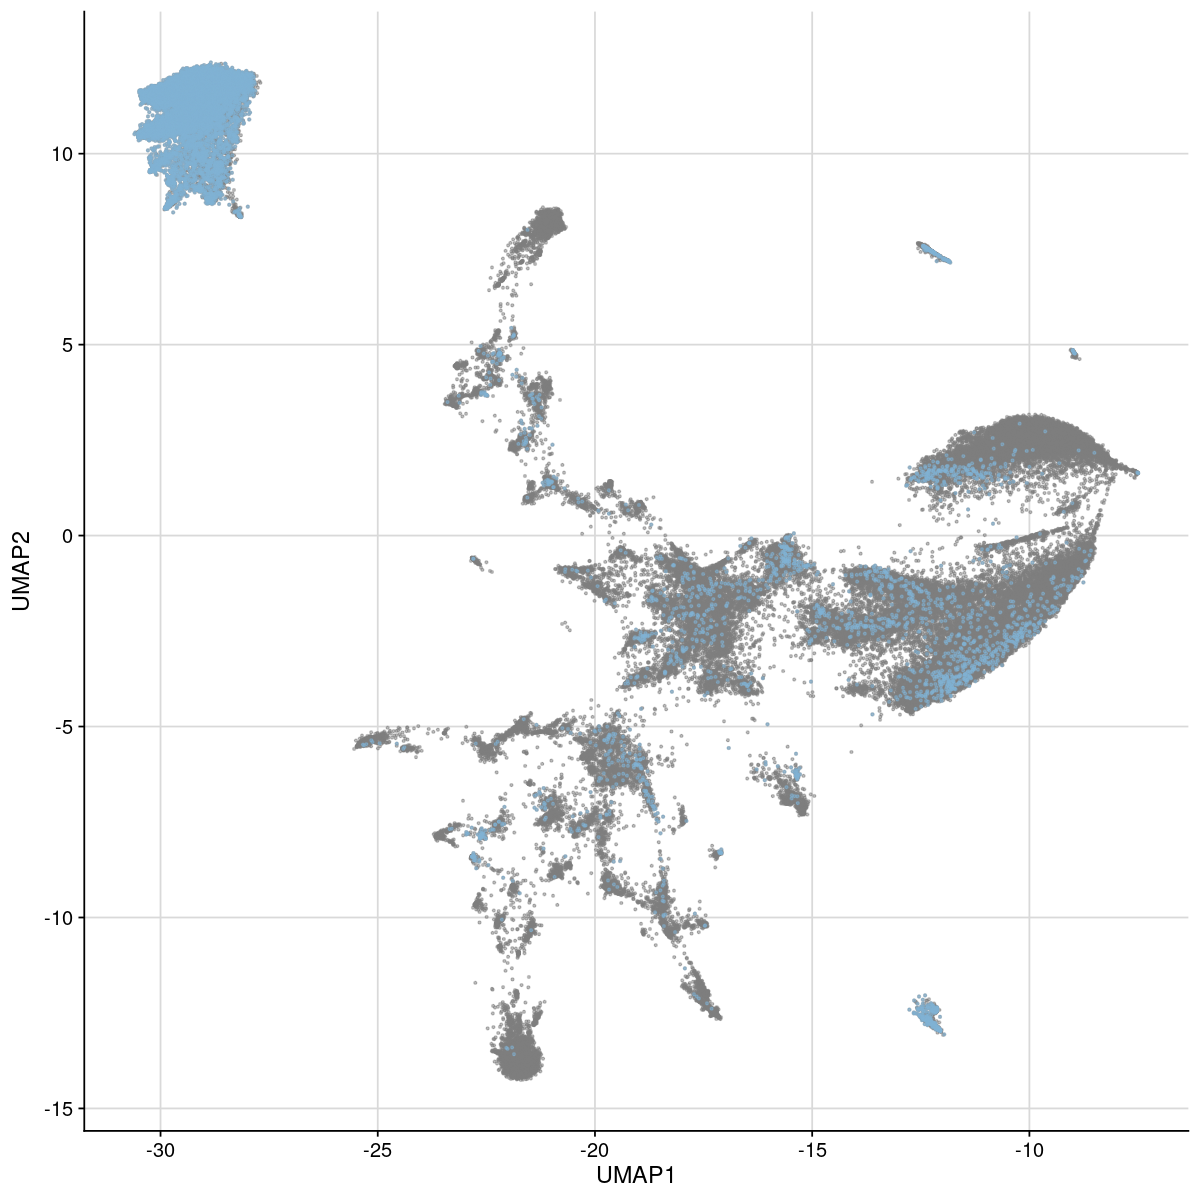

In [29]:
gpt = ggplot() +
    geom_point(data = dat, aes(x = UMAP1, y = UMAP2), size = 0.5, alpha = 0.5, color = "grey50") +
    geom_point(data = df2, aes(x = UMAP1, y = UMAP2), size = 0.5, alpha = 0.5, color = "#80b1d3") +
    theme_cowplot() +
    background_grid()

options(repr.plot.height = 10, repr.plot.width = 10)
print(gpt)

In [ ]:
gpt = ggplot() +
    geom_point(data = dat,     aes(x = UMAP1, y = UMAP2), size = 0.5, alpha = 0.5, color = "grey50") +
    geom_point(data = dat_PLS, aes(x = UMAP1, y = UMAP2), size = 0.5, alpha = 0.5, color = "#fb8072") +
    theme_cowplot() +
    background_grid()

options(repr.plot.height = 10, repr.plot.width = 10)
print(gpt)

In [29]:
dat = dat_merge
dat = dat %>%
    dplyr::select(Region, Cluster, CTCF, SMC3) %>%
    dplyr::mutate(Both      = CTCF * SMC3) %>%
    dplyr::mutate(CTCF_Only = CTCF - Both) %>%
    dplyr::mutate(SMC3_Only = SMC3 - Both) %>%
    dplyr::distinct()
head(dat)

Region,Cluster,CTCF,SMC3,Both,CTCF_Only,SMC3_Only
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:10038-10405,39,0,0,0,0,0
chr1:16025-16338,20,1,0,0,1,0
chr1:115429-115969,0,0,0,0,0,0
chr1:184091-184563,24,0,0,0,0,0
chr1:186343-187136,21,0,0,0,0,0
chr1:191204-191722,5,0,0,0,0,0


In [30]:
dat = dat_merge
dat = dat %>% dplyr::mutate(
    C02 = (Cluster == 2),
    C03 = (Cluster == 3),
    C08 = (Cluster == 8)
)
dat_tmp = dat

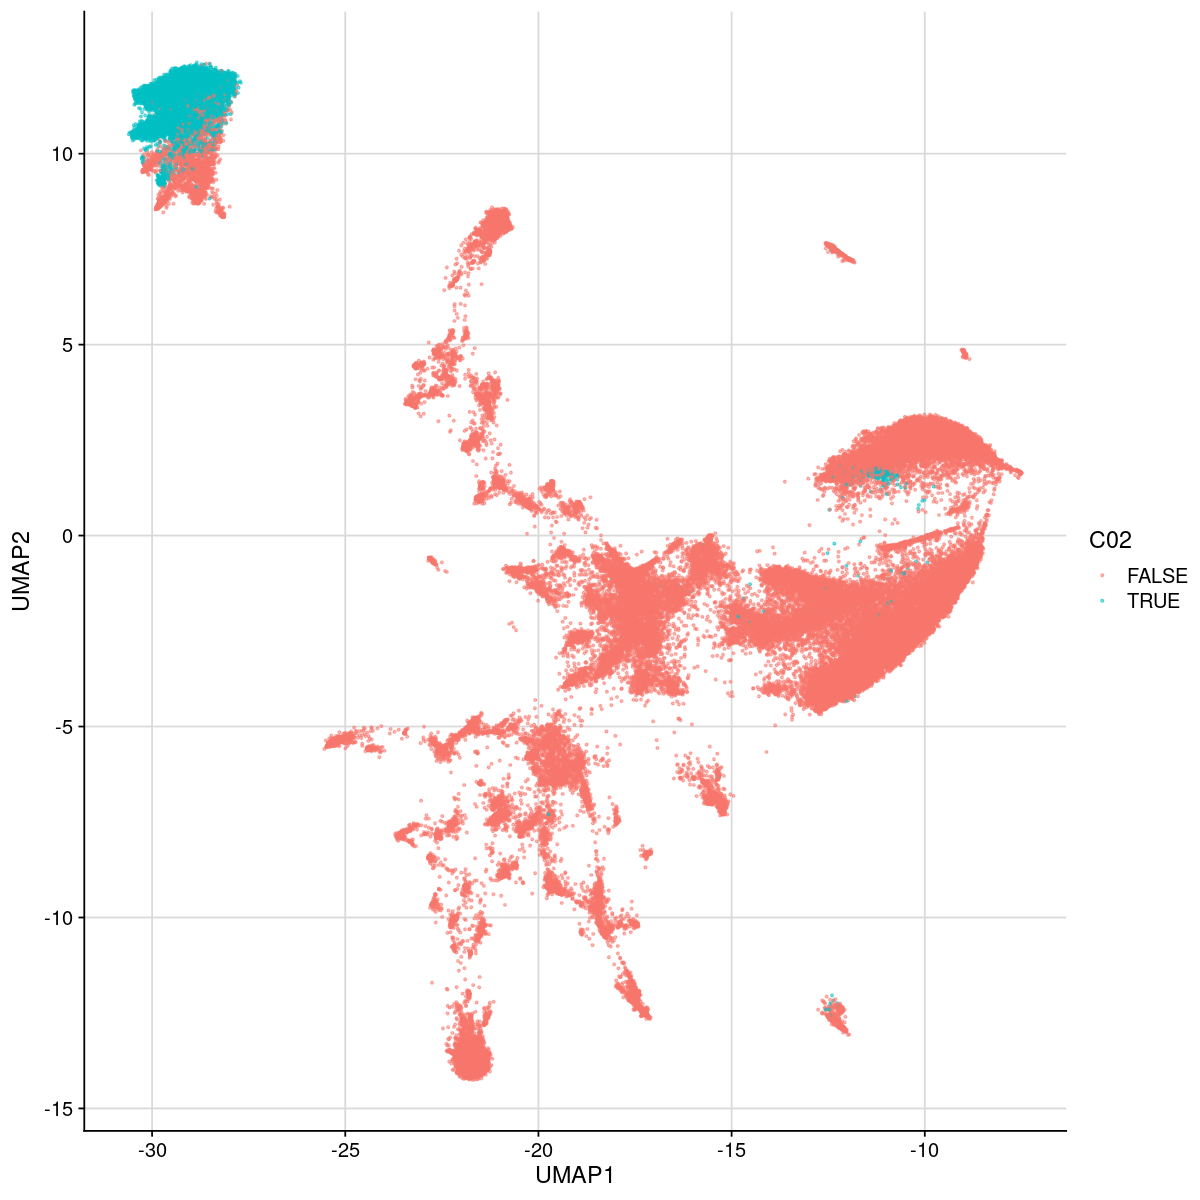

In [27]:
gpt = ggplot(dat, aes(x = UMAP1, y = UMAP2, color = C02)) +
    geom_point(size = 0.5, alpha = 0.5) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height = 10, repr.plot.width = 10)
print(gpt)

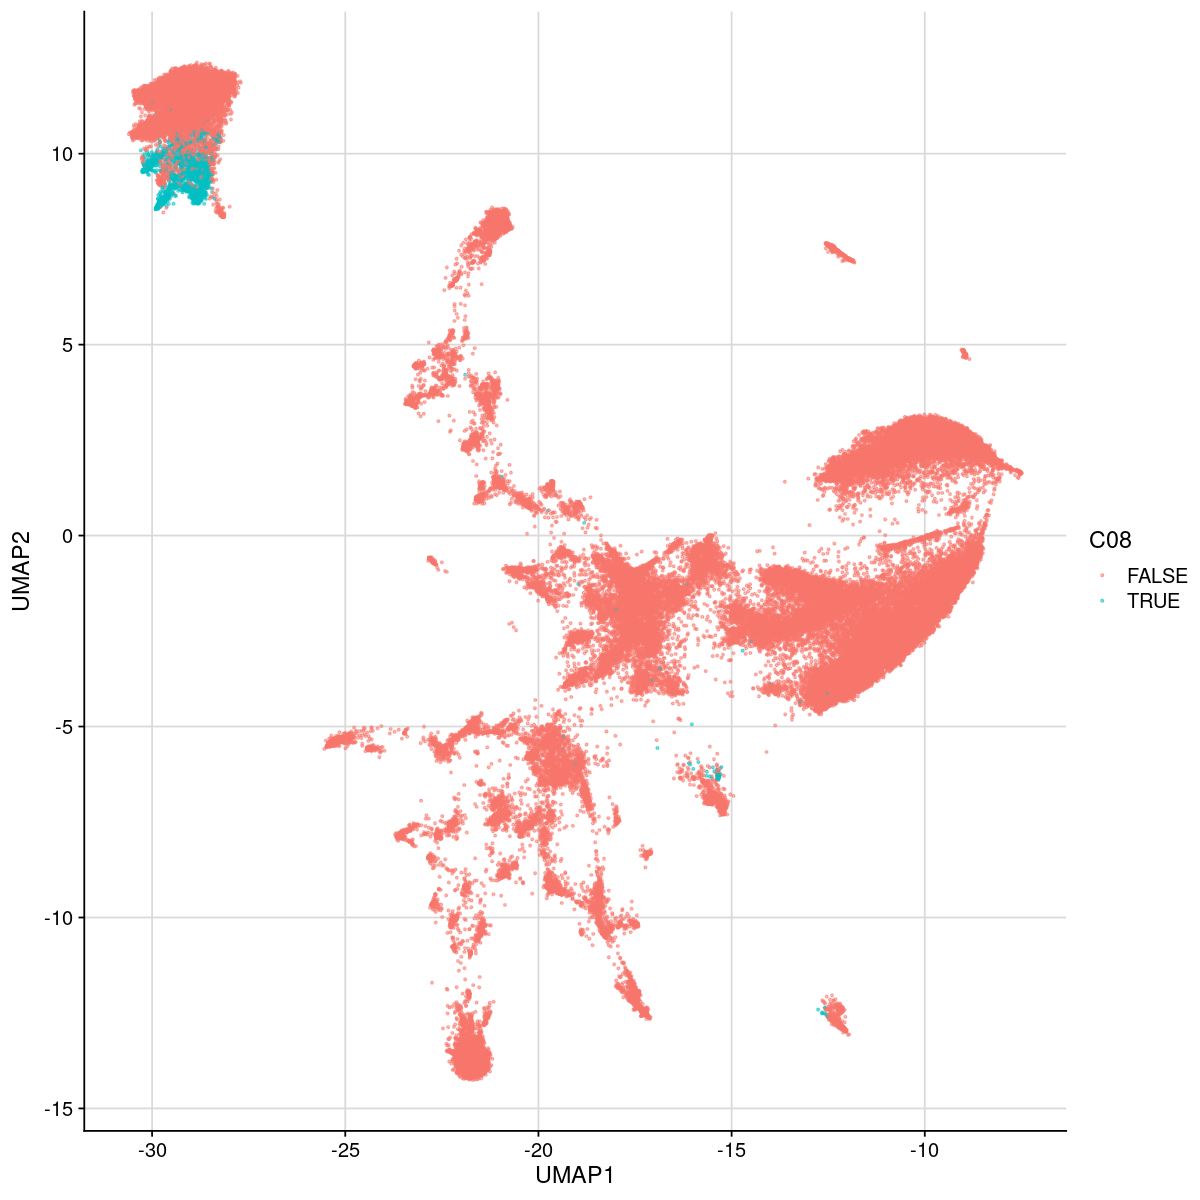

In [28]:
gpt = ggplot(dat, aes(x = UMAP1, y = UMAP2, color = C08)) +
    geom_point(size = 0.5, alpha = 0.5) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height = 10, repr.plot.width = 10)
print(gpt)

In [23]:
tmp = addmargins(table(dat$Cluster, dat$Both))

,0,1,Sum
-1,75,0,75
0,14761,872,15633
1,10194,2524,12718
2,679,8423,9102
3,6254,171,6425
4,4187,26,4213
5,3406,0,3406
6,2865,14,2879
7,2502,14,2516
8,1471,678,2149


In [ ]:
dat = dat_tmp